In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file = 'data.csv'
df = pd.read_csv(file, delimiter=';')
print(df.head())

   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                         

In [4]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [5]:
# Создание словаря с переводами колонок
translations = {
    'Marital status': 'Семейное положение',
    'Application mode': 'Режим подачи заявки',
    'Application order': 'Порядок подачи заявки',
    'Course': 'Направление',
    'Daytime/evening attendance\t': 'Дневная/вечерняя форма обучения',
    'Previous qualification': 'Предыдущее образование',
    'Previous qualification (grade)': 'Предыдущее образование (оценка)',
    'Nacionality': 'Национальность',
    "Mother's qualification": 'Образование матери',
    "Father's qualification": 'Образование отца',
    "Mother's occupation": 'Профессия матери',
    "Father's occupation": 'Профессия отца',
    'Admission grade': 'Вступительный балл',
    'Displaced': 'Перемещенный',
    'Educational special needs': 'Образовательные специальные потребности',
    'Debtor': 'Должник',
    'Tuition fees up to date': 'Платежи за обучение актуальны',
    'Gender': 'Пол',
    'Scholarship holder': 'Получатель стипендии',
    'Age at enrollment': 'Возраст при зачислении',
    'International': 'Международный статус',
    'Curricular units 1st sem (credited)': 'Учебные единицы 1-го семестра (зачтенные)',
    'Curricular units 1st sem (enrolled)': 'Учебные единицы 1-го семестра (зачисленные)',
    'Curricular units 1st sem (evaluations)': 'Учебные единицы 1-го семестра (оценки)',
    'Curricular units 1st sem (approved)': 'Учебные единицы 1-го семестра (утвержденные)',
    'Curricular units 1st sem (grade)': 'Учебные единицы 1-го семестра (оценка)',
    'Curricular units 1st sem (without evaluations)': 'Учебные единицы 1-го семестра (без оценок)',
    'Curricular units 2nd sem (credited)': 'Учебные единицы 2-го семестра (зачтенные)',
    'Curricular units 2nd sem (enrolled)': 'Учебные единицы 2-го семестра (зачисленные)',
    'Curricular units 2nd sem (evaluations)': 'Учебные единицы 2-го семестра (оценки)',
    'Curricular units 2nd sem (approved)': 'Учебные единицы 2-го семестра (утвержденные)',
    'Curricular units 2nd sem (grade)': 'Учебные единицы 2-го семестра (оценка)',
    'Curricular units 2nd sem (without evaluations)': 'Учебные единицы 2-го семестра (без оценок)',
    'Unemployment rate': 'Уровень безработицы',
    'Inflation rate': 'Уровень инфляции',
    'GDP': 'ВВП',
    'Target': 'Цель'
}

# Переименование колонок в DataFrame
df.rename(columns=translations, inplace=True)

# Проверка обновленных названий колонок
print(df.columns)

Index(['Семейное положение', 'Режим подачи заявки', 'Порядок подачи заявки',
       'Направление', 'Дневная/вечерняя форма обучения',
       'Предыдущее образование', 'Предыдущее образование (оценка)',
       'Национальность', 'Образование матери', 'Образование отца',
       'Профессия матери', 'Профессия отца', 'Вступительный балл',
       'Перемещенный', 'Образовательные специальные потребности', 'Должник',
       'Платежи за обучение актуальны', 'Пол', 'Получатель стипендии',
       'Возраст при зачислении', 'Международный статус',
       'Учебные единицы 1-го семестра (зачтенные)',
       'Учебные единицы 1-го семестра (зачисленные)',
       'Учебные единицы 1-го семестра (оценки)',
       'Учебные единицы 1-го семестра (утвержденные)',
       'Учебные единицы 1-го семестра (оценка)',
       'Учебные единицы 1-го семестра (без оценок)',
       'Учебные единицы 2-го семестра (зачтенные)',
       'Учебные единицы 2-го семестра (зачисленные)',
       'Учебные единицы 2-го семестра (оц

In [6]:
# Создание нового DataFrame
# Список нужных колонок
needed_columns = [
    'Режим подачи заявки',
    'Порядок подачи заявки',
    'Направление',
    'Дневная/вечерняя форма обучения',
    'Предыдущее образование',
    'Предыдущее образование (оценка)',
    'Вступительный балл',
    'Перемещенный',
    'Образовательные специальные потребности',
    'Пол',
    'Возраст при зачислении',
    'Получатель стипендии',
    'Международный статус',
    'Уровень безработицы',
    'Уровень инфляции',
    'ВВП'
]

# Создание нового DataFrame с выбранными колонками
new_df = df[needed_columns]

output_file_path = 'new_data.csv'
new_df.to_csv(output_file_path, index=False, encoding='utf-8-sig')


In [7]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 16 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Режим подачи заявки                      4424 non-null   int64  
 1   Порядок подачи заявки                    4424 non-null   int64  
 2   Направление                              4424 non-null   int64  
 3   Дневная/вечерняя форма обучения          4424 non-null   int64  
 4   Предыдущее образование                   4424 non-null   int64  
 5   Предыдущее образование (оценка)          4424 non-null   float64
 6   Вступительный балл                       4424 non-null   float64
 7   Перемещенный                             4424 non-null   int64  
 8   Образовательные специальные потребности  4424 non-null   int64  
 9   Пол                                      4424 non-null   int64  
 10  Возраст при зачислении                   4424 no

In [8]:
new_df.isnull().sum()

Режим подачи заявки                        0
Порядок подачи заявки                      0
Направление                                0
Дневная/вечерняя форма обучения            0
Предыдущее образование                     0
Предыдущее образование (оценка)            0
Вступительный балл                         0
Перемещенный                               0
Образовательные специальные потребности    0
Пол                                        0
Возраст при зачислении                     0
Получатель стипендии                       0
Международный статус                       0
Уровень безработицы                        0
Уровень инфляции                           0
ВВП                                        0
dtype: int64

In [9]:
new_df.describe(include='all')

,Режим подачи заявки,Порядок подачи заявки,Направление,Дневная/вечерняя форма обучения,Предыдущее образование,Предыдущее образование (оценка),Вступительный балл,Перемещенный,Образовательные специальные потребности,Пол,Возраст при зачислении,Получатель стипендии,Международный статус,Уровень безработицы,Уровень инфляции,ВВП
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,126.978119,0.548373,0.011528,0.351718,23.265145,0.248418,0.024864,11.566139,1.228029,0.001969
std,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,14.482001,0.497711,0.106760,0.477560,7.587816,0.432144,0.155729,2.663850,1.382711,2.269935
min,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,95.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,117.900000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,9.400000,0.300000,-1.700000
50%,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,126.100000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,11.100000,1.400000,0.320000
75%,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,134.800000,1.000000,0.000000,1.000000,25.000000,0.000000,0.000000,13.900000,2.600000,1.790000
max,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,190.000000,1.000000,1.000000,1.000000,70.000000,1.000000,1.000000,16.200000,3.700000,3.510000


In [10]:
new_df['Направление_код'], unique = pd.factorize(df['Направление'])


C:\Users\1645295\AppData\Local\Temp\ipykernel_14088\4180637307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Направление_код'], unique = pd.factorize(df['Направление'])


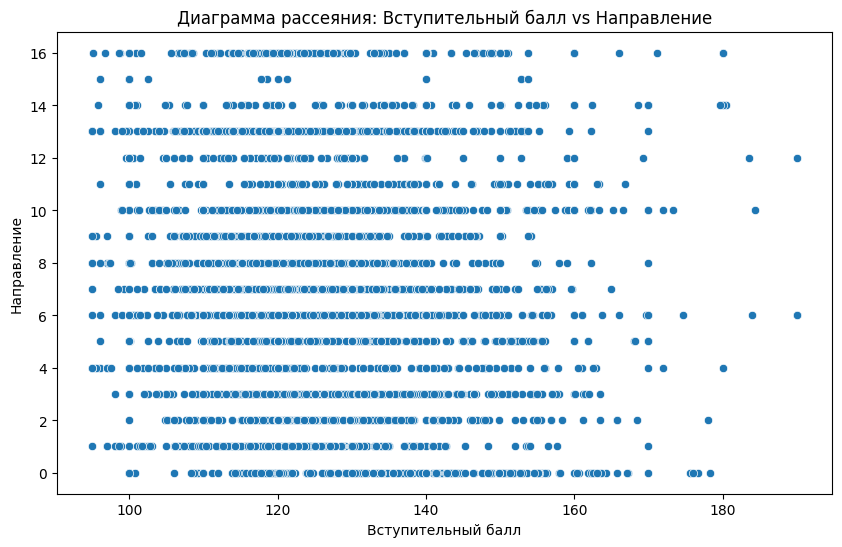

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Вступительный балл', y='Направление_код', data=new_df)
plt.title('Диаграмма рассеяния: Вступительный балл vs Направление')
plt.xlabel('Вступительный балл')
plt.ylabel('Направление')
plt.show()

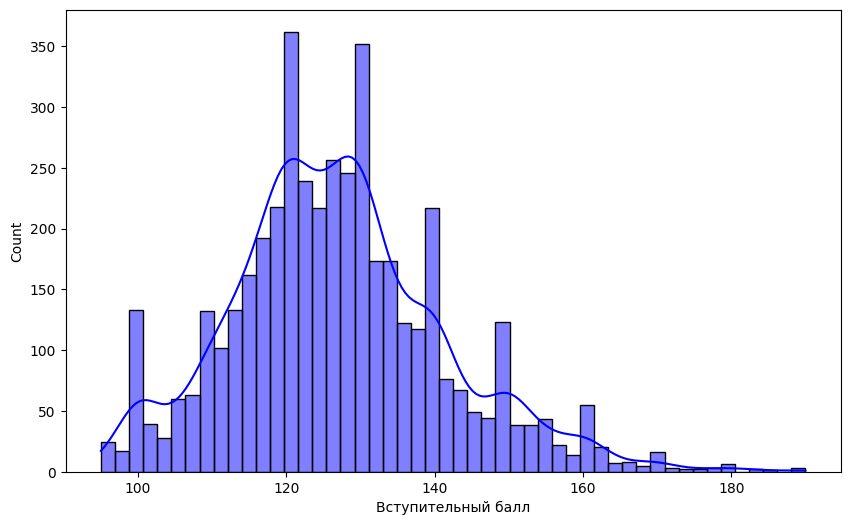

In [65]:
plt.figure(figsize=(10, 6))
sns.histplot(new_df['Вступительный балл'], bins=50, kde=True, color='blue')

plt.show()

с помощью данного графика можно понять, какое количество баллов у большинства студентов при поступлении 
позволяет оценить минимальные баллы для поступления

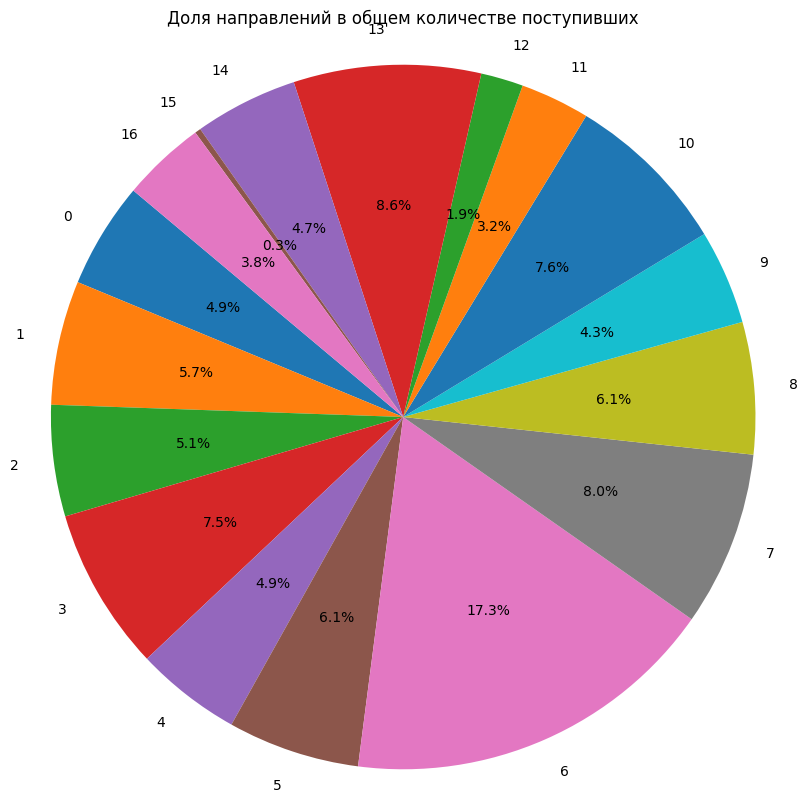

In [12]:
grouped_data = new_df.groupby('Направление_код').size().reset_index(name='Количество_поступивших')
grouped_data
# Визуализация данных
plt.figure(figsize=(10, 10))
plt.pie(grouped_data['Количество_поступивших'], labels=grouped_data['Направление_код'], autopct='%1.1f%%', startangle=140)
plt.title('Доля направлений в общем количестве поступивших')
plt.axis('equal')
plt.show()


создать новый столбец год который будет учитывать популярность направления и для самых популярных будет увеличиваться на 20% а для менее на 15% и совсем не популярных 10% каждый год   

In [13]:
df = pd.DataFrame(new_df)

# Подсчет количества студентов по направлениям
counts = df['Направление_код'].value_counts().reset_index()
counts.columns = ['Направление_код', 'Количество_поступивших']

# Определение коэффициентов роста
growth_factors = {
    # Самое популярное направление (6)
    6: [1.2, 1.44, 1.728],   # +20% каждый год
}

# Менее популярные направления (3, 7, 10 и 13)
for direction in [3, 7, 10, 13]:
    growth_factors[direction] = [1.15, 1.3225, 1.520875] # +15% каждый год

# Совсем не популярные направления (все остальные)
for direction in df['Направление_код']:
    if direction not in growth_factors:
        growth_factors[direction] = [1.1, 1.21, 1.331] # +10% каждый год


# Добавление нового столбца "Год"
years = [2022, 2023, 2024]
num_students = len(df)

# Назначение годов на основе индекса (через остаток от деления)
df['Год'] = [years[i % len(years)] for i in range(num_students)]

# Подсчет количества студентов по направлениям для каждого года с учетом коэффициентов роста
new_records = []

for index, row in df.iterrows():
    direction = row['Направление_код']
    year_index = years.index(row['Год']) # Получаем индекс года
    count = int(100 * growth_factors[direction][year_index]) # Начальное количество студентов (например, можно взять за базу)
    
    new_records.append({'Год': row['Год'], 'Направление': direction})
# Создание нового DataFrame с распределением по годам
final_df = pd.DataFrame(new_records)

# Просмотр результатов
print(final_df)

         Год  Направление
0     2022.0          0.0
1     2023.0          1.0
2     2024.0          2.0
3     2022.0          3.0
4     2023.0          4.0
...      ...          ...
4419  2022.0          3.0
4420  2023.0          3.0
4421  2024.0          6.0
4422  2022.0         13.0
4423  2023.0          3.0

[4424 rows x 2 columns]


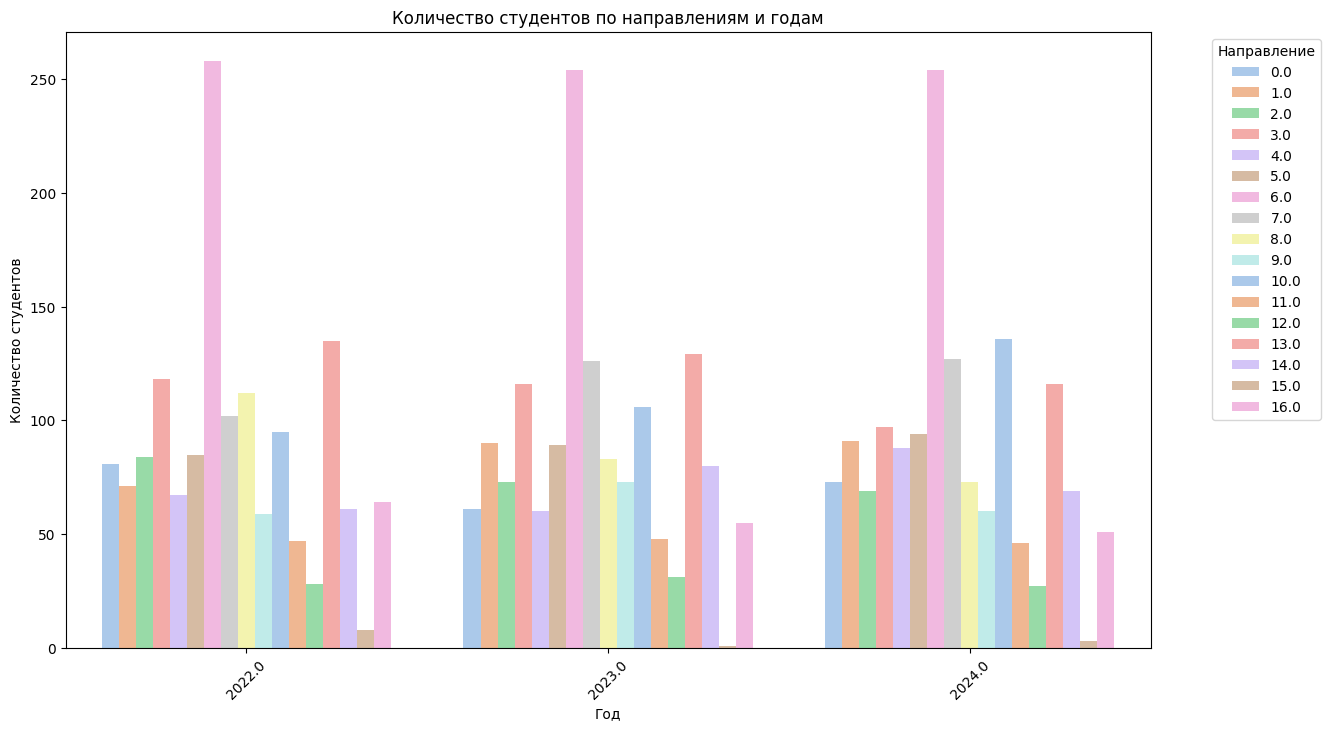

In [14]:
count_df = final_df.groupby(['Год', 'Направление']).size().reset_index(name='Количество')
# Визуализация результатов
plt.figure(figsize=(14, 8))
sns.barplot(x='Год', y='Количество', hue='Направление', data=count_df, palette='pastel')
plt.title('Количество студентов по направлениям и годам')
plt.xlabel('Год')
plt.ylabel('Количество студентов')
plt.legend(title='Направление', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)  # Поворот меток на оси X для удобства чтения
plt.show()

In [15]:
# Подсчет общего количества студентов по годам
total_students_per_year = final_df['Год'].value_counts()
total_students_per_year

Год
2022.0    1475
2023.0    1475
2024.0    1474
Name: count, dtype: int64

In [16]:
final_df['Уровень безработицы'] = new_df['Уровень безработицы']
final_df['Уровень инфляции'] = new_df['Уровень инфляции']
final_df['Вступительный балл'] = new_df['Вступительный балл']
final_df['Пол'] = new_df['Пол']
final_df

,Год,Направление,Уровень безработицы,Уровень инфляции,Вступительный балл,Пол
0,2022.0,0.0,10.8,1.4,127.3,1
1,2023.0,1.0,13.9,-0.3,142.5,1
2,2024.0,2.0,10.8,1.4,124.8,1
3,2022.0,3.0,9.4,-0.8,119.6,0
4,2023.0,4.0,13.9,-0.3,141.5,0
...,...,...,...,...,...,...
4419,2022.0,3.0,15.5,2.8,122.2,1
4420,2023.0,3.0,11.1,0.6,119.0,0
4421,2024.0,6.0,13.9,-0.3,149.5,0
4422,2022.0,13.0,9.4,-0.8,153.8,0


In [17]:
final_df['Образовательные специальные потребности'] = new_df['Образовательные специальные потребности']
final_df['Дневная/вечерняя форма обучения'] = new_df['Дневная/вечерняя форма обучения']
final_df['Предыдущее образование (оценка)'] = new_df['Предыдущее образование (оценка)']
final_df['Перемещенный'] = new_df['Перемещенный']
final_df['Возраст при зачислении'] = new_df['Возраст при зачислении']
final_df['Международный статус'] = new_df['Международный статус']
final_df['ВВП'] = new_df['ВВП']

                                              Год  Направление  \
Год                                      1.000000    -0.007745   
Направление                             -0.007745     1.000000   
Уровень безработицы                     -0.003725     0.034484   
Уровень инфляции                        -0.004961     0.011697   
Вступительный балл                       0.005319    -0.028868   
Пол                                     -0.001535     0.120939   
Образовательные специальные потребности -0.010344    -0.027719   
Дневная/вечерняя форма обучения         -0.026730     0.211132   
Предыдущее образование (оценка)          0.015448     0.012631   
Перемещенный                            -0.006927    -0.103805   
Возраст при зачислении                  -0.000246     0.043881   
Международный статус                     0.003600     0.012098   
ВВП                                     -0.003364     0.007747   
Количество абитуриентов                  0.002195    -0.117258   

         

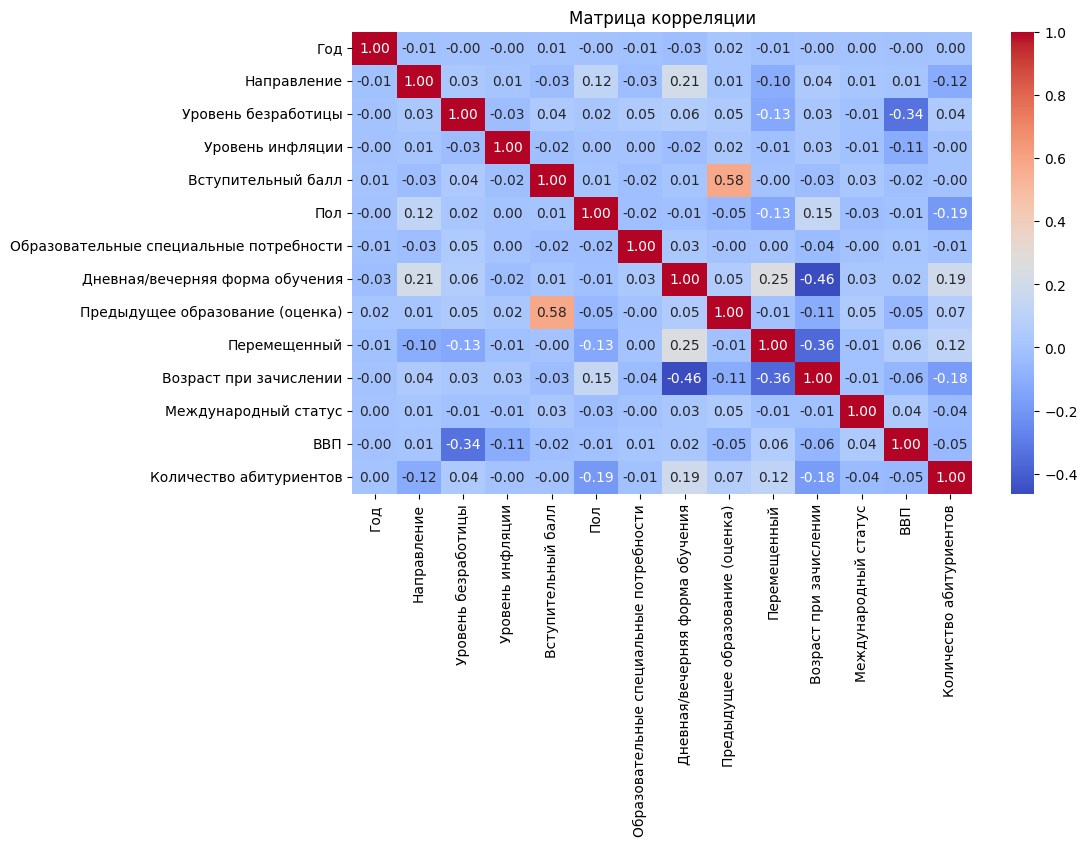

In [56]:
# Вычисление корреляции
correlation_matrix = final_df.corr()
print(correlation_matrix)

# Визуализация матрицы корреляции
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляции')
plt.show()


Количество абитуриентов:
Пол: -0.19
Дневная/вечерняя форма: 0.19
Перемещенный: 0.12
Возраст: -0.18


In [19]:
final_df['Количество абитуриентов'] = df.groupby('Направление')['Направление'].transform('count')

In [ ]:
final_df

,Год,Направление,Уровень безработицы,Уровень инфляции,Вступительный балл,Пол,Образовательные специальные потребности,Дневная/вечерняя форма обучения,Предыдущее образование (оценка),Перемещенный,Возраст при зачислении,Международный статус,ВВП,Количество абитуриентов
0,2022.0,0.0,10.8,1.4,127.3,1,0,1,122.0,1,20,0,1.74,215
1,2023.0,1.0,13.9,-0.3,142.5,1,0,1,160.0,1,19,0,0.79,252
2,2024.0,2.0,10.8,1.4,124.8,1,0,1,122.0,1,19,0,1.74,226
3,2022.0,3.0,9.4,-0.8,119.6,0,0,1,122.0,1,20,0,-3.12,331
4,2023.0,4.0,13.9,-0.3,141.5,0,0,0,100.0,0,45,0,0.79,215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,2022.0,3.0,15.5,2.8,122.2,1,0,1,125.0,0,19,0,-4.06,331
4420,2023.0,3.0,11.1,0.6,119.0,0,0,1,120.0,1,18,1,2.02,331
4421,2024.0,6.0,13.9,-0.3,149.5,0,0,1,154.0,1,30,0,0.79,766
4422,2022.0,13.0,9.4,-0.8,153.8,0,0,1,180.0,1,20,0,-3.12,380


In [60]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


# Определение зависимой и независимых переменных
X = final_df[['Направление', 'Пол', 'Возраст при зачислении', 'Дневная/вечерняя форма обучения', 
               'Перемещенный', 'Вступительный балл', 'Уровень безработицы', 'Уровень инфляции', 'Образовательные специальные потребности',
                 'Предыдущее образование (оценка)', 'Международный статус', 'ВВП']]
y = final_df['Количество абитуриентов']

# Добавление константы для свободного члена
X = sm.add_constant(X)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели
model = sm.OLS(y_train, X_train).fit()

# Оценка модели
print(model.summary())

# Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)

# Вывод предсказанных значений
print("Предсказанные значения:", y_pred)

                               OLS Regression Results                              
Dep. Variable:     Количество абитуриентов   R-squared:                       0.103
Model:                                 OLS   Adj. R-squared:                  0.100
Method:                      Least Squares   F-statistic:                     33.65
Date:                     Sun, 19 Jan 2025   Prob (F-statistic):           1.61e-74
Time:                             15:53:07   Log-Likelihood:                -23563.
No. Observations:                     3539   AIC:                         4.715e+04
Df Residuals:                         3526   BIC:                         4.723e+04
Df Model:                               12                                         
Covariance Type:                 nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

Наиболее значимые факторы для выбора направления:
Дневная/вечерняя форма обучения
Пол
Возраст при зачислении
Факторы с отрицательным влиянием:
Вступительный балл
Перемещенный статус
Образовательные специальные потребност

Коэффициенты линейной регрессии:
Направление                                 -6.393514
Пол                                        -66.168714
Возраст при зачислении                      -1.317828
Дневная/вечерняя форма обучения            120.762804
Перемещенный                                 9.682018
Вступительный балл                          -0.809790
Уровень безработицы                          1.953959
Уровень инфляции                             0.034490
Образовательные специальные потребности    -46.216600
Предыдущее образование (оценка)              1.244898
Международный статус                       -68.268602
ВВП                                         -3.923760
dtype: float64


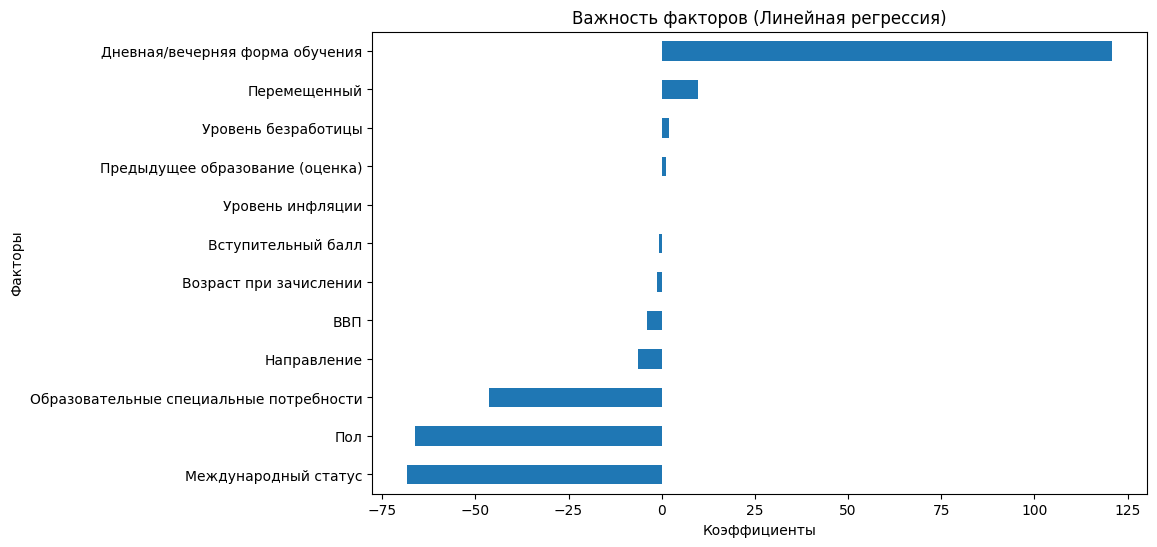

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Определение целевой переменной и факторов
X = final_df[['Направление', 'Пол', 'Возраст при зачислении', 'Дневная/вечерняя форма обучения', 
               'Перемещенный', 'Вступительный балл', 'Уровень безработицы', 'Уровень инфляции', 'Образовательные специальные потребности',
                 'Предыдущее образование (оценка)', 'Международный статус', 'ВВП']]
y = final_df['Количество абитуриентов'] 

# Обучение модели линейной регрессии
linear_model = LinearRegression()
linear_model.fit(X, y)

# Коэффициенты модели
coeff = pd.Series(linear_model.coef_, index=X.columns)
print("Коэффициенты линейной регрессии:")
print(coeff)

# Визуализация важности факторов
plt.figure(figsize=(10,6))
coeff.sort_values().plot(kind='barh')
plt.title('Важность факторов (Линейная регрессия)')
plt.xlabel('Коэффициенты')
plt.ylabel('Факторы')
plt.show()

Важность факторов (Случайный лес):
Пол                                        0.034016
Возраст при зачислении                     0.145758
Дневная/вечерняя форма обучения            0.016704
Перемещенный                               0.036410
Вступительный балл                         0.352520
Уровень безработицы                        0.062682
Уровень инфляции                           0.053816
Образовательные специальные потребности    0.004043
Предыдущее образование (оценка)            0.211088
Международный статус                       0.005478
ВВП                                        0.077486
dtype: float64


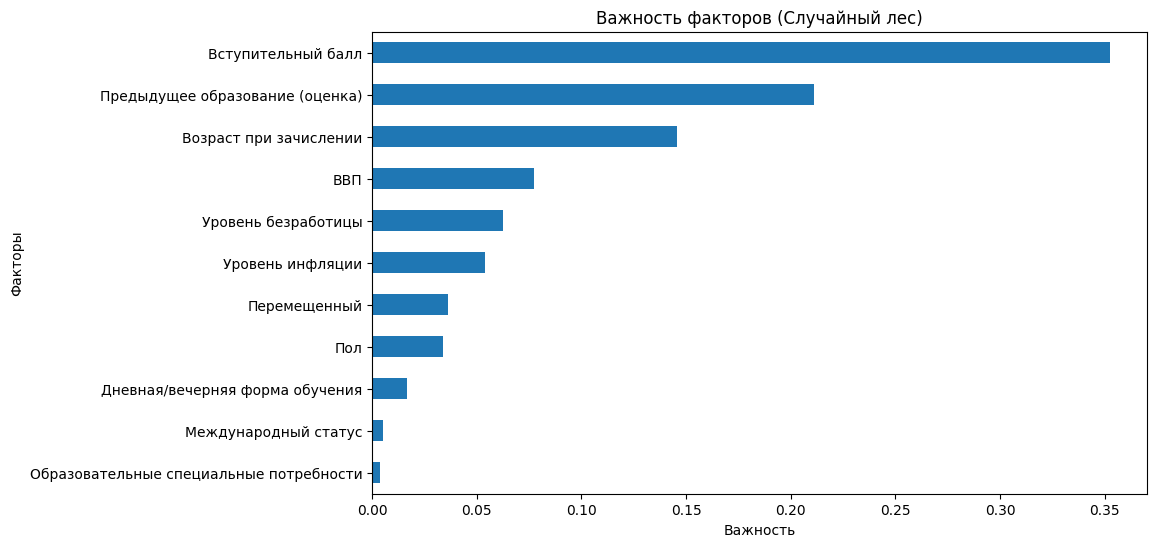

In [23]:
from sklearn.ensemble import RandomForestRegressor

X = final_df[['Пол', 'Возраст при зачислении', 'Дневная/вечерняя форма обучения', 
               'Перемещенный', 'Вступительный балл', 'Уровень безработицы', 'Уровень инфляции', 'Образовательные специальные потребности',
                 'Предыдущее образование (оценка)', 'Международный статус', 'ВВП']]
y = final_df['Количество абитуриентов'] 

# Обучение модели случайного леса
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X, y)

# Важность признаков
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
print("Важность факторов (Случайный лес):")
print(importances)

# Визуализация важности факторов
plt.figure(figsize=(10,6))
importances.sort_values().plot(kind='barh')
plt.title('Важность факторов (Случайный лес)')
plt.xlabel('Важность')
plt.ylabel('Факторы')
plt.show()

Важность факторов (Градиентный бустинг):
Пол                                        0.114865
Возраст при зачислении                     0.217769
Дневная/вечерняя форма обучения            0.084380
Перемещенный                               0.035150
Вступительный балл                         0.222622
Уровень безработицы                        0.017746
Уровень инфляции                           0.012518
Образовательные специальные потребности    0.002317
Предыдущее образование (оценка)            0.203553
Международный статус                       0.005042
ВВП                                        0.084039
dtype: float64


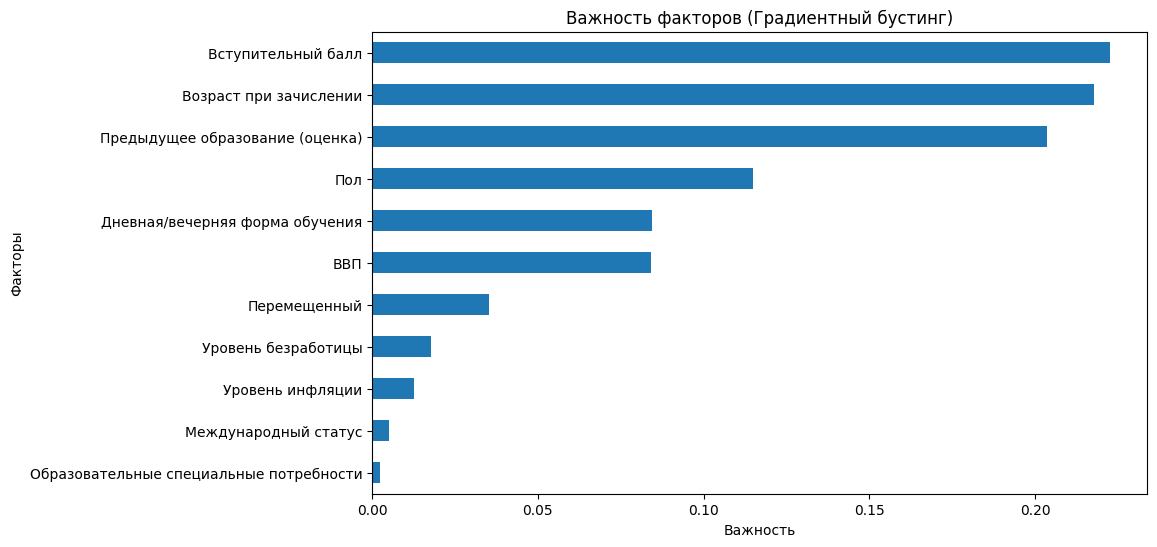

In [24]:
from sklearn.ensemble import GradientBoostingRegressor

# Обучение модели градиентного бустинга
gb_model = GradientBoostingRegressor(n_estimators=100)
gb_model.fit(X, y)

# Важность признаков
importances_gb = pd.Series(gb_model.feature_importances_, index=X.columns)
print("Важность факторов (Градиентный бустинг):")
print(importances_gb)
# Визуализация важности факторов
plt.figure(figsize=(10,6))
importances_gb.sort_values().plot(kind='barh')
plt.title('Важность факторов (Градиентный бустинг)')
plt.xlabel('Важность')
plt.ylabel('Факторы')
plt.show()

In [25]:
from sklearn.linear_model import LassoCV

# Определение целевой переменной и факторов
X = final_df[['Направление', 'Пол', 'Возраст при зачислении', 'Дневная/вечерняя форма обучения', 
               'Перемещенный', 'Вступительный балл', 'Уровень безработицы', 'Уровень инфляции', 'Образовательные специальные потребности',
                 'Предыдущее образование (оценка)', 'Международный статус', 'ВВП']]
y = final_df['Количество абитуриентов'] 

# Обучение Lasso-регрессии с кросс-валидацией
lasso_model = LassoCV(cv=5)
lasso_model.fit(X, y)

# Вывод коэффициентов Lasso-регрессии
lasso_coefficients = pd.Series(lasso_model.coef_, index=X.columns)
print(lasso_coefficients[lasso_coefficients != 0])

Направление                                 -6.322880
Пол                                        -64.791827
Возраст при зачислении                      -1.409848
Дневная/вечерняя форма обучения            116.728418
Перемещенный                                 8.913000
Вступительный балл                          -0.802728
Уровень безработицы                          1.878683
Образовательные специальные потребности    -22.036722
Предыдущее образование (оценка)              1.233973
Международный статус                       -56.790360
ВВП                                         -3.949690
dtype: float64


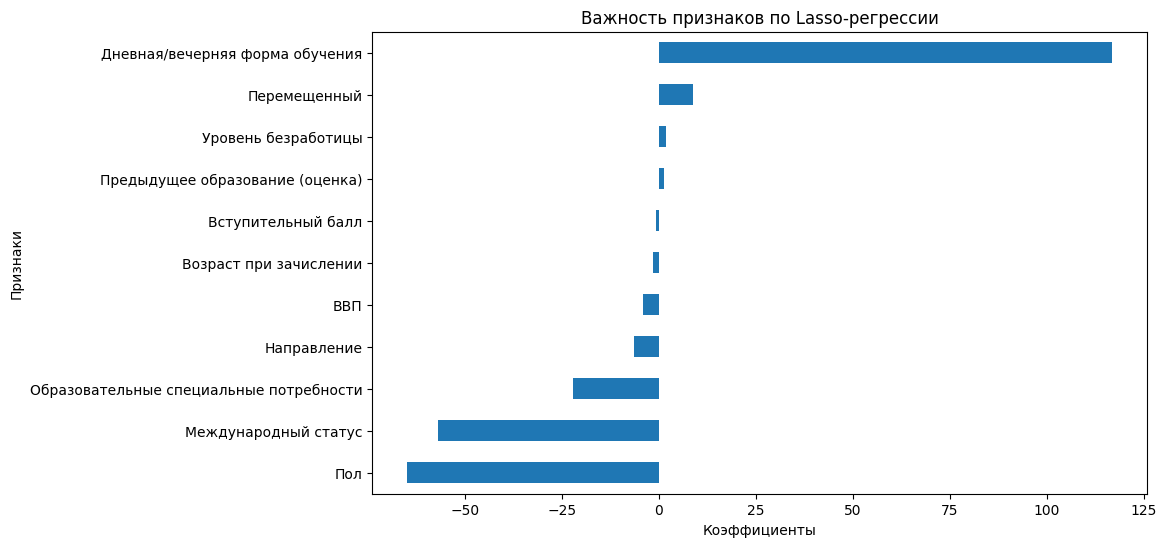

In [55]:
import matplotlib.pyplot as plt

# Создание DataFrame для визуализации
importance = pd.Series({
    'Направление': -6.322880,
    'Пол': -64.791827,
    'Возраст при зачислении': -1.409848,
    'Дневная/вечерняя форма обучения': 116.728418,
    'Перемещенный': 8.913000,
    'Вступительный балл': -0.802728,
    'Уровень безработицы': 1.878683,
    'Образовательные специальные потребности': -22.036722,
    'Предыдущее образование (оценка)': 1.233973,
    'Международный статус': -56.790360,
    'ВВП': -3.949690
})

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
importance.sort_values().plot(kind='barh')
plt.title('Важность признаков по Lasso-регрессии')
plt.xlabel('Коэффициенты')
plt.ylabel('Признаки')
plt.show()

1. Пол
2. Дневная/вечерняя форма обучения
3. Направление
4. Возраст при зачислении
5. Вступительный балл
6. Предыдущее образование (оценка)

In [113]:
output_file_path = 'final.csv'
final_df.to_csv(output_file_path, index=False, encoding='utf-8-sig')